# Projeto WPT - Grupo 2
Arthur Tamm, Caio Bôa, Gabriel Hermida e Pedro Civita

## Importando Bibliotecas

In [1]:
import numpy as np
from capacitor import Capacitor
from indutor import Indutor
import cmath
from numpy import sqrt, pi, linalg
import matplotlib.pyplot as plt

# Etapa 1

1) Circuito a ser modelado

<img src="./circuitoWPT.png" width=800px>

Definindo funções que serão úteis ao longo do projeto

In [2]:
def freqResonancia(l, c):   #Calcula a frequência de ressonância do circuito dado a indutância e a capacitância
    return 1/(2*pi*sqrt(l*c))

def CalcularTransformadorProjeto(v1, rc, r, l, k, c, f): #Calcula as correntes do primário e secundário e a tensão no secundário
    w = 2*pi*f

    xl = w*l*1j
    xc = 1/(w*c*1j)
    m = k*l
    xm = m*w*1j
    
    Z=np.array([[r+xl+xc, -xm],[-xm, xl+r+1/(1/rc+1/xc)]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)

    Zeq = 1/(1/rc+1/xc)
    V2 = I[1]*Zeq

    return I[0],I[1], V2

def CalcularTransformadorProjeto2(v1, rc, r1, r2, l1, l2, k, c, f): #Calcula as correntes do primário e secundário e a tensão no secundário com valores diferentes de resistência, indutância do primário para o secundário
    w = 2*pi*f

    xl1 = w*l1*1j
    xl2 = w*l2*1j
    xc = 1/(w*c*1j)
    m = k*sqrt(l1*l2)
    xm = m*w*1j
    
    Z=np.array([[r1+xl1+xc, -xm],[-xm, xl2+r2+1/(1/rc+1/xc)]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)

    Zeq = 1/(1/rc+1/xc)
    V2 = I[1]*Zeq

    return I[0],I[1], V2

def real(zeq):
    return abs(zeq)*np.cos(cmath.phase(zeq))

def capacitorPelaFreqRes(freq, indutancia): #Calcula a capacitância do capacitor dado a frequência de ressonância e a indutância
    return 1/(4*pi**2*freq**2*indutancia)

def indutorPelaFreqRes(freq, capacitancia): #Calcula a indutância do indutor dado a frequência de ressonância e a capacitância
    return 1/(4*pi**2*freq**2*capacitancia)

2)

Declarando variáveis com valores arbitrários

In [3]:
l  = 0.01   #indutância das bobinas
c = 0.47e-6 #capacitância do capacitor em série com a bobina primária e em paralelo com a bobina secundária

freqRes = freqResonancia(l, c)
print("Frequencia de ressonancia: ", freqRes)

v1 = 10   #tensão de alimentação da bobina primária

rc = 100  #resistência de carga na bobina secundária
r = 1     #resistência das bobinas

k = 0.3   #coeficiente de acoplamento
m = k*l   #indutância mútua

frequencies = np.arange(1000, 100000, 10) #array de frequências

values = {"i1": [], "i2": [], "v2": []} #dicionário para armazenar os valores de corrente e tensão

Frequencia de ressonancia:  2321.5134420947206


3) Percorrendo valores de frequência de 1 KHz até 100 KHz para observar o comportamento das correntes i1 e i2

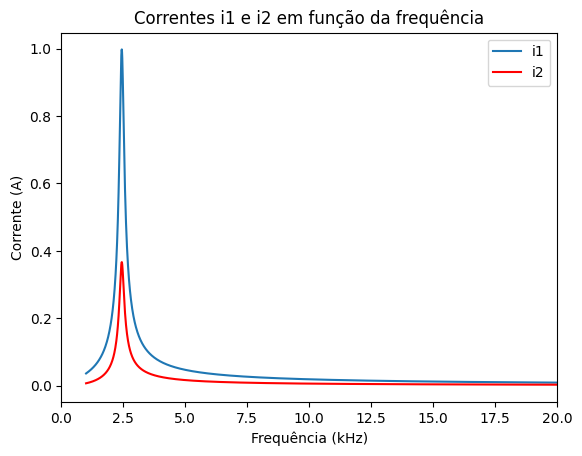

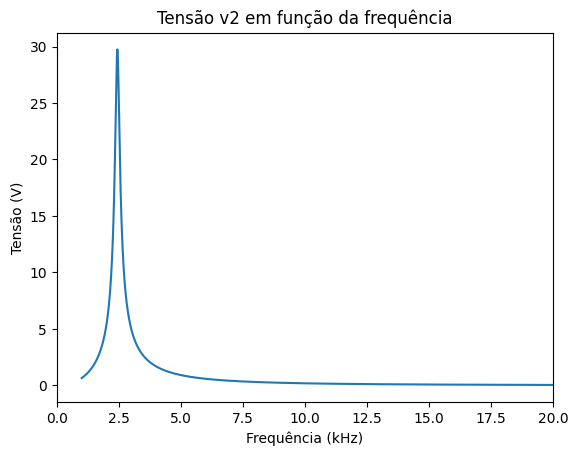

In [4]:
for f in frequencies:
    i1, i2, v2 = CalcularTransformadorProjeto(v1, rc, r, l, k, c, f)
    values["i1"].append(abs(i1))
    values["i2"].append(abs(i2))
    values["v2"].append(abs(v2))
    
plt.plot(frequencies/1e3, values["i1"])
plt.plot(frequencies/1e3, values["i2"], color="red")
plt.legend(["i1", "i2"])
plt.title("Correntes i1 e i2 em função da frequência")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Corrente (A)")
plt.xlim(0, 20)
plt.show()

plt.plot(frequencies/1e3, values["v2"])
plt.title("Tensão v2 em função da frequência")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Tensão (V)")
plt.xlim(0, 20)
plt.show()



In [5]:
# Descobrindo o valor de frequência que causa correntes máximas
f1 = frequencies[values['i1'].index(max(values['i1']))]
f2 = frequencies[values['i2'].index(max(values['i2']))]
f3 = frequencies[values['v2'].index(max(values['v2']))]

print("Frequência que causa corrente máxima no primário: ", f1, "Hz")
print("Frequência que causa corrente máxima no secundário: ", f2, "Hz")
print("Frequência que causa tensão máxima no secundário: ", f3, "V")

Frequência que causa corrente máxima no primário:  2440 Hz
Frequência que causa corrente máxima no secundário:  2440 Hz
Frequência que causa tensão máxima no secundário:  2440 V


Para K=0.3, a frequência de ressonância encontradada através da equação $ \frac{1}{2\pi\sqrt{lc}} $ foi 2321.51 Hz. Já a encontrada pelo valor máximo de i1 e i2 foi 2440 Hz.




Observando o impacto de K na tensão e corrente do secundário

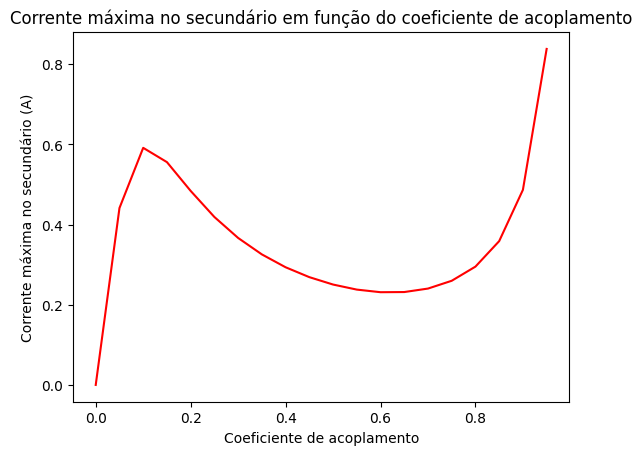

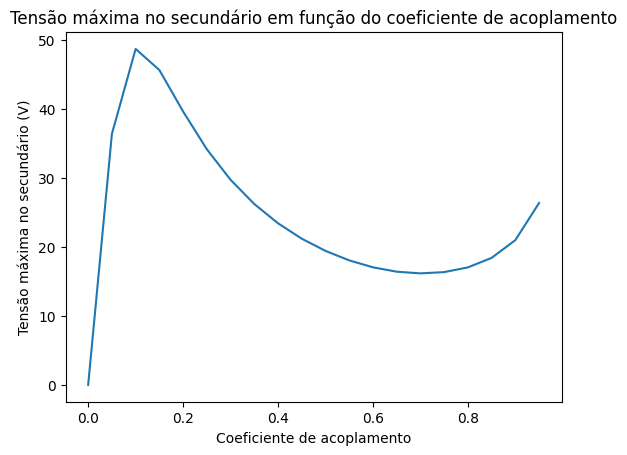

In [6]:
k_list = np.arange(0, 1, 0.05) #array de coeficientes de acoplamento
i2_max = []
v2_max = []
f = 2440
for k in k_list:
    values = {"i1": [], "i2": [], "v2": []} 
    for f in frequencies:
        i1, i2, v2 = CalcularTransformadorProjeto(v1, rc, r, l, k, c, f)
        values["i1"].append(abs(i1))
        values["i2"].append(abs(i2))
        values["v2"].append(abs(v2))
    i2_max.append(max(values["i2"]))
    v2_max.append(max(values["v2"]))	
    # plt.plot(frequencies/1e3, values["i2"])
    # print("Corrente máxima no secundário para k = ", k, " : ", max(values["i2"]), "A")
# for k in k_list:

#     i1, i2, v2 = CalcularTransformadorProjeto(v1, rc, r, l, k, c, f)
#     i2_list.append(i2)
#     v2_list.append(v2)

plt.plot(k_list, i2_max, color="red")
plt.title("Corrente máxima no secundário em função do coeficiente de acoplamento")
plt.ylabel("Corrente máxima no secundário (A)")
plt.xlabel("Coeficiente de acoplamento")
plt.show()

plt.plot(k_list, v2_max)
plt.title("Tensão máxima no secundário em função do coeficiente de acoplamento")
plt.ylabel("Tensão máxima no secundário (V)")
plt.xlabel("Coeficiente de acoplamento")
plt.show()
# plt.legend(k_list)
# plt.title("Corrente i2 em função da frequência")
# plt.xlabel("Frequência (kHz)")
# plt.ylabel("Corrente (A)")
# plt.ylim(0, 0.5)
# plt.show()


In [7]:
k1 = k_list[i2_max.index(max(i2_max))]
k2 = k_list[v2_max.index(max(v2_max))]

print(f"Coeficiente de acoplamento: {k1} causa corrente máxima {max(i2_max)}A no secundário: ")
print(f"Coeficiente de acoplamento: {k2} causa tensão máxima {max(v2_max)}V no secundário: ")

Coeficiente de acoplamento: 0.9500000000000001 causa corrente máxima 0.8381008905019742A no secundário: 
Coeficiente de acoplamento: 0.1 causa tensão máxima 48.718934992935V no secundário: 


4) Analisando o comportamento da tensão V2 no secundário pela frequência de ressonância para diferentes indutâncias

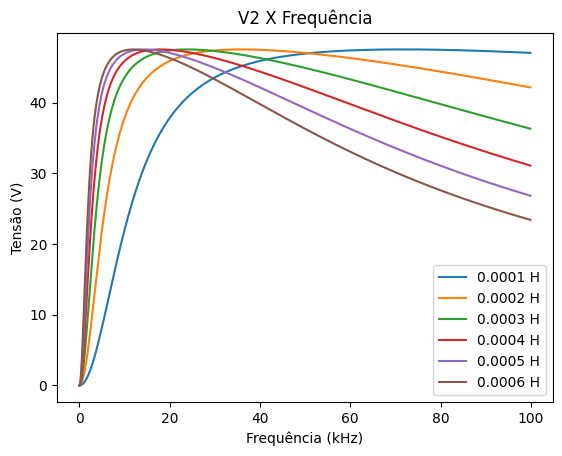

In [8]:
l_list = [100e-6, 200e-6, 300e-6, 400e-6, 500e-6, 600e-6]
# l2_list = [0.1, 0.5, 1, 5, 10, 50]
freqs = np.arange(1, 100e3, 100)
k = 0.1
for l in l_list:
    v2_max = []
    m = k*l
    for f in freqs:
        c = capacitorPelaFreqRes(f, l)
        i1, i2, v2 = CalcularTransformadorProjeto(v1, rc, r, l, k, c, f)
        v2_max.append(abs(v2))
    plt.plot(freqs/1e3, v2_max, label=f"{l} H")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Tensão (V)")
plt.title('V2 X Frequência')
plt.legend()
plt.show()



Analisando o comportamento da tensão V2 no secundário pela frequência de ressonância para diferentes capacitâncias

Frequência de ressonância 71001.0Hz para indutância 2.5380524473590115e-05H e capacitância 1e-07F

Indutor de 0.00005025 H e capacitor de 1e-07 F

Frequência de ressonância 47401.0Hz para indutância 1.692034964906008e-05H e capacitância 1.5e-07F

Indutor de 0.00007516 H e capacitor de 1.5e-07 F

Frequência de ressonância 7101.0Hz para indutância 2.538052447359012e-06H e capacitância 1e-06F

Indutor de 0.00050234 H e capacitor de 1e-06 F

Frequência de ressonância 1501.0Hz para indutância 5.400111590125557e-07H e capacitância 4.7e-06F

Indutor de 0.00239211 H e capacitor de 4.7e-06 F

Frequência de ressonância 15101.0Hz para indutância 5.400111590125556e-06H e capacitância 4.7e-07F

Indutor de 0.00023634 H e capacitor de 4.7e-07 F



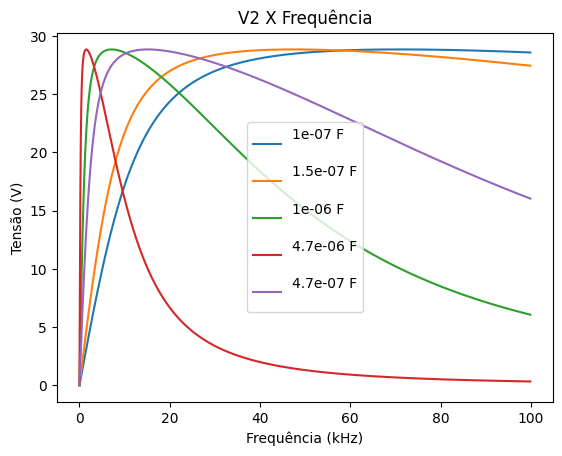

In [9]:
c_list = [0.1e-6, 150e-9, 1e-6, 4.7e-6, 0.47e-6]
# l2_list = [0.1, 0.5, 1, 5, 10, 50]
freqs = np.arange(1, 100e3, 100)
k = 0.3
for c in c_list:
    v2_max = []
    m = k*l
    l_list = []
    for f in freqs:
        l = indutorPelaFreqRes(f, c)
        l_list.append(l)
        i1, i2, v2 = CalcularTransformadorProjeto(v1, rc, r, l, k, c, f)
        v2_max.append(abs(v2))
    l_res = l_list[v2_max.index(max(v2_max))]
    print(f"Frequência de ressonância {freqResonancia(l_res, c):.1f}Hz para indutância {l}H e capacitância {c}F\n")

    print(f'Indutor de {l_res:.8f} H e capacitor de {c} F\n')
    plt.plot(freqs/1e3, v2_max, label=f"{c} F\n")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Tensão (V)")
plt.title('V2 X Frequência')
plt.legend()
plt.show()

5) Analisando o comportamento das potências em função da frequência

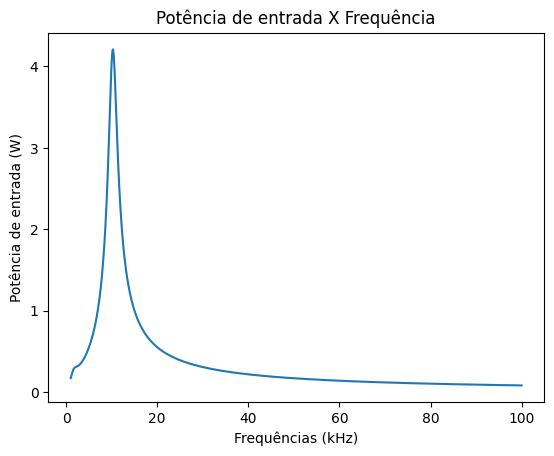

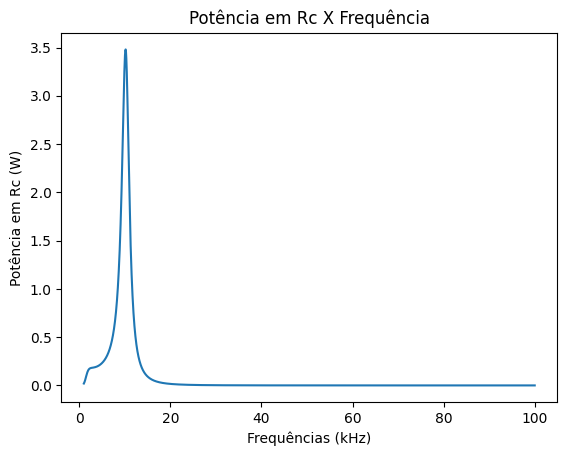

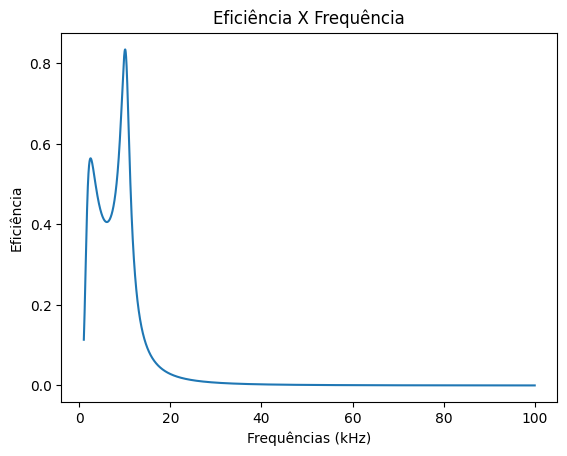

In [10]:
pe  = v1*np.array(values['i1']).conjugate()/2 # potência de entrada

ic = np.array(values['v2']) / rc # corrente no resistor de carga
ps = np.array(values['v2'])*ic.conjugate()/2 # potência de carga

plt.plot(frequencies/1e3, pe.real)
plt.title('Potência de entrada X Frequência')
plt.xlabel('Frequências (kHz)')
plt.ylabel('Potência de entrada (W)')
plt.show()

plt.plot(frequencies/1e3, ps.real)
plt.title('Potência em Rc X Frequência')
plt.xlabel('Frequências (kHz)')
plt.ylabel('Potência em Rc (W)')
plt.show()

plt.plot(frequencies/1e3, ps.real/pe.real)
plt.title('Eficiência X Frequência')
plt.xlabel('Frequências (kHz)')
plt.ylabel('Eficiência')
plt.show()


6) Analisando o valor de pico da tensão V2 no secundário em função do coeficiente de acoplamento K

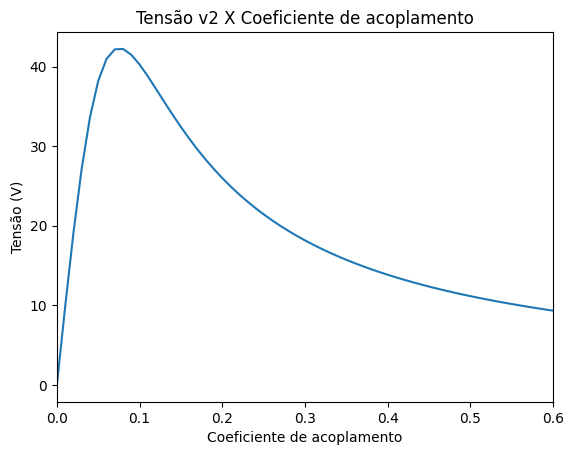

In [11]:
l  = 0.01
c = 0.47e-6

fr = freqResonancia(l, c)

k_list = np.arange(0, 1, 0.01)
v2_max = []

for k in k_list:
    _,_, v2 = CalcularTransformadorProjeto(v1, rc, r, l, k, c, fr)
    v2_max.append(abs(v2))

plt.plot(k_list, v2_max)
plt.xlim(0, 0.6)
plt.title("Tensão v2 X Coeficiente de acoplamento")
plt.xlabel("Coeficiente de acoplamento")
plt.ylabel("Tensão (V)")
plt.show()



In [12]:
best_k = k_list[v2_max.index(max(v2_max))]
print(f"O coeficiente de acoplamento: {best_k} é o que garante maior tensão no secundário: {max(v2_max)}V")

O coeficiente de acoplamento: 0.08 é o que garante maior tensão no secundário: 42.22606416953653V


### Refazendo etapa 1 para r1 e r2 diferentes e l1 e l2 diferentes


 Na construção das bobinas no laboratório, foram obtidas duas bobinas com resistências e indutâncias ligeiramente diferentes

In [13]:
c = 0.47e-6
v1 = 5 * 2/pi
rc = 100
k = 0.11
frequencies = np.arange(1000, 100000, 10)
values = {"i1": [], "i2": [], "v2": []}
l2 = 347e-6
l1 = 348e-6
incerteza = 1.2
r2 = 0.852 * incerteza
r1 = 0.856 * incerteza

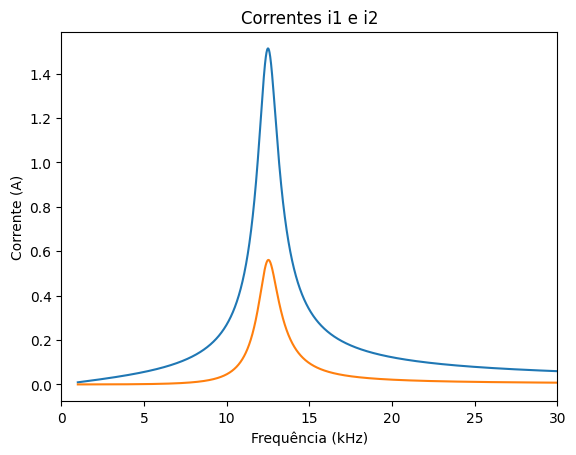

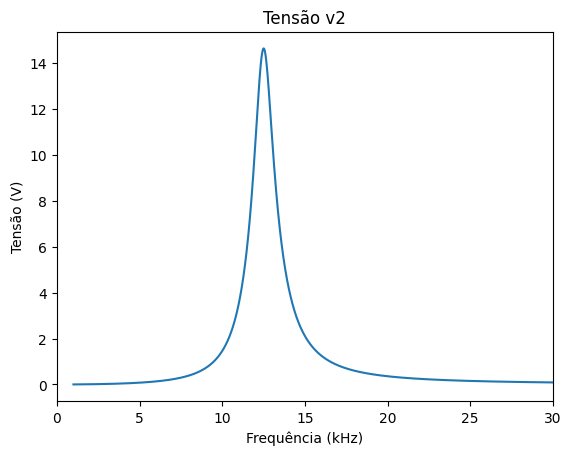

In [14]:
for f in frequencies:
    i1, i2, v2 = CalcularTransformadorProjeto2(v1, rc, r1, r2, l1,l2, k, c, f)
    values["i1"].append(abs(i1))
    values["i2"].append(abs(i2))
    values["v2"].append(abs(v2))
    
plt.plot(frequencies/1e3, values["i1"])
plt.plot(frequencies/1e3, values["i2"])

plt.title("Correntes i1 e i2")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Corrente (A)")
plt.xlim(0, 30)
plt.show()

plt.plot(frequencies/1e3, values["v2"])
plt.title("Tensão v2")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Tensão (V)")
plt.xlim(0, 30)
plt.show()

In [15]:
# Descobrindo o valor de frequência que causa correntes máximas
freq_res = frequencies[values['i2'].index(max(values['i2']))]

print(f"Frequência de ressonância de {freq_res}Hz")

Frequência de ressonância de 12530Hz


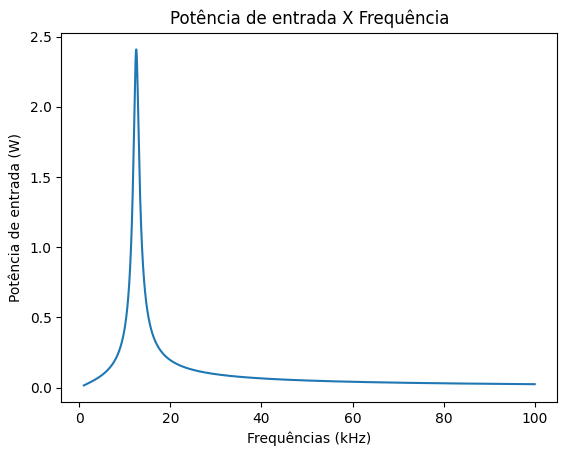

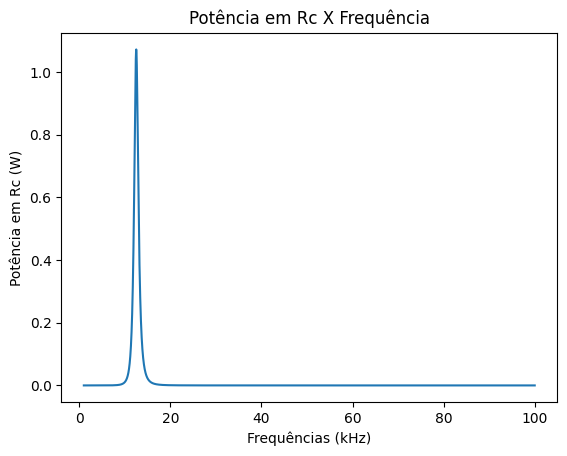

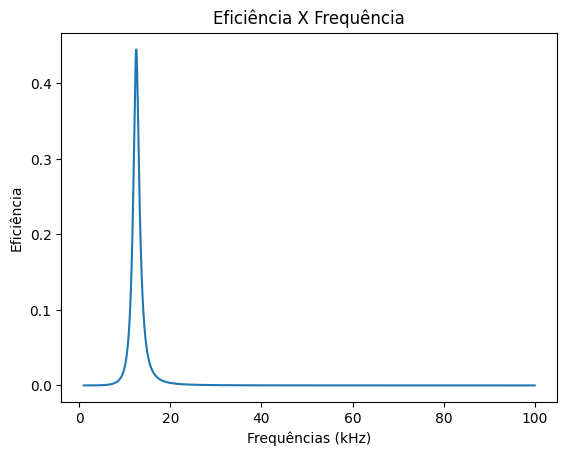

In [16]:
pe  = v1*np.array(values['i1']).conjugate()/2 # potência de entrada

ic = np.array(values['v2']) / rc # corrente no resistor de carga
ps = np.array(values['v2'])*ic.conjugate()/2 # potência de carga

plt.plot(frequencies/1e3, pe.real)
plt.title('Potência de entrada X Frequência')
plt.xlabel('Frequências (kHz)')
plt.ylabel('Potência de entrada (W)')
plt.show()

plt.plot(frequencies/1e3, ps.real)
plt.title('Potência em Rc X Frequência')
plt.xlabel('Frequências (kHz)')
plt.ylabel('Potência em Rc (W)')
plt.show()

plt.plot(frequencies/1e3, ps.real/pe.real)
plt.title('Eficiência X Frequência')
plt.xlabel('Frequências (kHz)')
plt.ylabel('Eficiência')
plt.show()


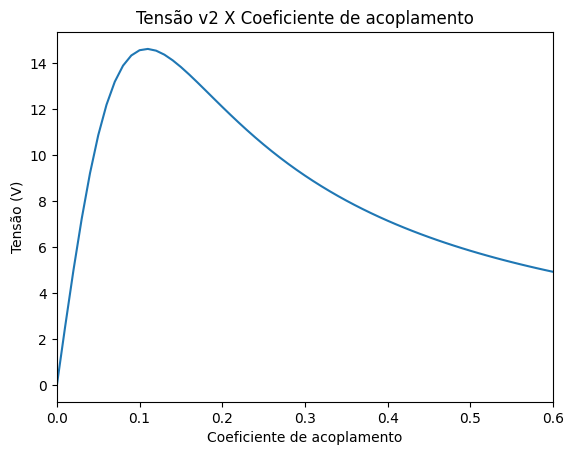

In [17]:
k_list = np.arange(0, 1, 0.01)
v2_max = []

for k in k_list:
    _,_, v2 = CalcularTransformadorProjeto2(v1, rc, r1, r2, l1,l2, k, c, freq_res)
    v2_max.append(abs(v2))

plt.plot(k_list, v2_max)
plt.xlim(0, 0.6)
plt.title("Tensão v2 X Coeficiente de acoplamento")
plt.xlabel("Coeficiente de acoplamento")
plt.ylabel("Tensão (V)")
plt.show()


In [18]:
# Descobrindo o valor de k que causa maior tensão no secundário
print(f"Tensão no secundário: {max(v2_max)}V")
best_k = k_list[v2_max.index(max(v2_max))]
print(f"O coeficiente de acoplamento: {best_k} é o que garante maior tensão no secundário: {max(v2_max)}V")

Tensão no secundário: 14.627818775768963V
O coeficiente de acoplamento: 0.11 é o que garante maior tensão no secundário: 14.627818775768963V


A conclusão que tentamos tirar do circuito é a potência máxima que poderíamos tirar do resistor de carga de 100 $\Omega$. Colocamos a fonte de tensão continua no máximo de 33V e alcançamos uma tensão de pico de 75V na bobina secundária.

Para calcular a potência em rc:

Inicialmente, utilizamos apenas a resistência medida de R1 e R2, desconsiderando as resistências dos fios e dos jumpers utilizados na montagem do circuito.

Analiticamente:

In [19]:
c = 0.47e-6
rc = 100
k = 0.11
f = 12530
values = {"i1": [], "i2": [], "v2": []}
l2 = 347e-6
l1 = 348e-6
r2 = 0.852
r1 = 0.856

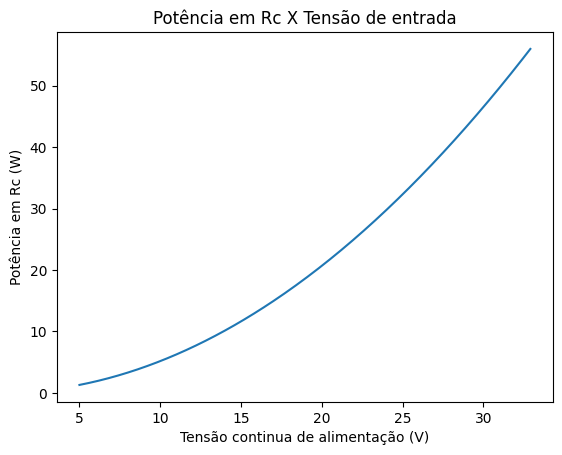

In [20]:
v1_list_mod = np.arange(5, 33, 0.1)
for v1 in v1_list_mod:
    v1 = v1 * 2/pi
    i1, i2, v2 = CalcularTransformadorProjeto2(v1, rc, r1, r2, l1,l2, k, c, f)
    values["i1"].append(abs(i1))
    values["i2"].append(abs(i2))
    values["v2"].append(abs(v2))

p_carga_mod = (np.array(values['v2']) / np.sqrt(2))**2 / rc
plt.plot(v1_list_mod, p_carga_mod)
plt.title("Potência em Rc X Tensão de entrada")
plt.xlabel("Tensão continua de alimentação (V)")
plt.ylabel("Potência em Rc (W)")
plt.show()

Experimentalmente:

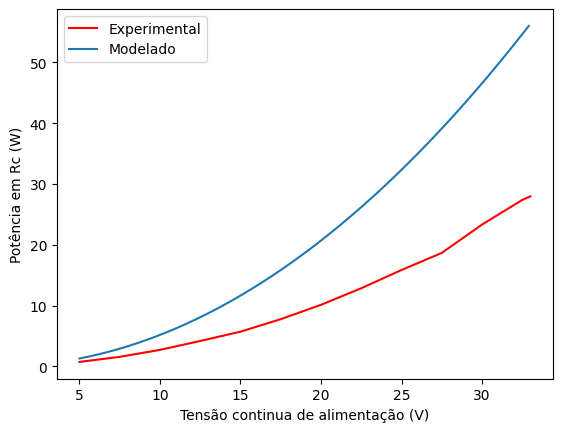

In [21]:
v1_list_exp = [5,     7.5,   10, 12.5,   15, 17.5, 20, 22.5,   25, 27.5,   30, 32.5,   33] # Tensão da fonte de alimentação DC
v2_list_exp =  [12.1, 17.7, 23.3, 28.9, 33.8, 39.4, 45, 50.7, 56.3, 61.1, 68.3,   74, 74.8] # Tensão de pico no secundário


p_carga_exp = [] # Potência em Rc

p_carga_exp = (v2_list_exp/np.sqrt(2))**2/rc
# Vef = Vpmax/np.sqrt(2)

# S = Vef**2/rc

plt.plot(v1_list_exp, p_carga_exp, 'r')
plt.plot(v1_list_mod, p_carga_mod)
plt.legend(["Experimental", "Modelado"])
plt.xlabel("Tensão continua de alimentação (V)")
plt.ylabel("Potência em Rc (W)")
plt.show()

In [22]:
p_max_exp = max(p_carga_exp)
p_max_mod = max(p_carga_mod)

print(f"Potência máxima experimental: {p_max_exp} W")
print(f"Potência máxima modelada: {p_max_mod} W")
print(f"Erro: {abs(p_max_exp - p_max_mod)/p_max_exp*100}%")

Potência máxima experimental: 27.975199999999994 W
Potência máxima modelada: 55.99923260047743 W
Erro: 100.17455675197118%


Agora, considerando 0.7 $ \Omega $ de resistência dos fios e dos jumpers:

In [23]:
values = {"i1": [], "i2": [], "v2": []}
incerteza = 0.7
r2_incerteza = 0.852 + incerteza
r1_incerteza = 0.856 + incerteza

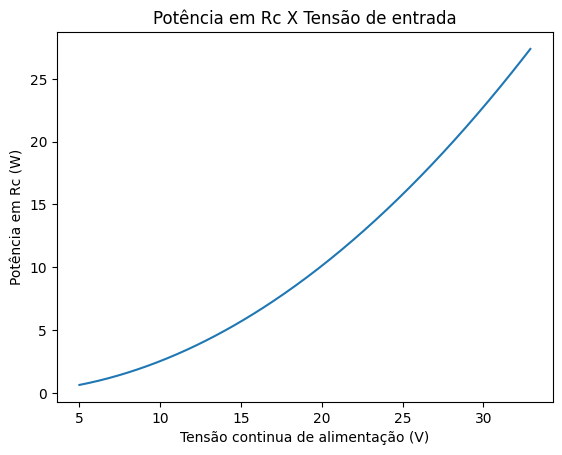

In [24]:
v1_list_mod = np.arange(5, 33, 0.1)
for v1 in v1_list_mod:
    v1 = v1 * 2/pi
    i1, i2, v2 = CalcularTransformadorProjeto2(v1, rc, r1_incerteza, r2_incerteza, l1,l2, k, c, f)
    values["i1"].append(abs(i1))
    values["i2"].append(abs(i2))
    values["v2"].append(abs(v2))

p_carga_mod = (np.array(values['v2']) / np.sqrt(2))**2 / rc
plt.plot(v1_list_mod, p_carga_mod)
plt.title("Potência em Rc X Tensão de entrada")
plt.xlabel("Tensão continua de alimentação (V)")
plt.ylabel("Potência em Rc (W)")
plt.show()

Experimentalmente:

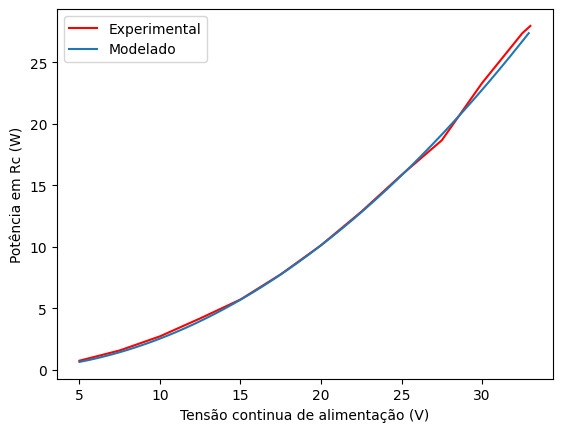

In [25]:
v1_list_exp = [5,     7.5,   10, 12.5,   15, 17.5, 20, 22.5,   25, 27.5,   30, 32.5,   33] # Tensão da fonte de alimentação DC
v2_list_exp =  [12.1, 17.7, 23.3, 28.9, 33.8, 39.4, 45, 50.7, 56.3, 61.1, 68.3,   74, 74.8] # Tensão de pico no secundário


p_carga_exp = [] # Potência em Rc

p_carga_exp = (v2_list_exp/np.sqrt(2))**2/rc
# Vef = Vpmax/np.sqrt(2)

# S = Vef**2/rc

plt.plot(v1_list_exp, p_carga_exp, 'r')
plt.plot(v1_list_mod, p_carga_mod)
plt.legend(["Experimental", "Modelado"])
plt.xlabel("Tensão continua de alimentação (V)")
plt.ylabel("Potência em Rc (W)")
plt.show()

In [26]:
p_max_exp = max(p_carga_exp)
p_max_mod = max(p_carga_mod)

print(f"Potência máxima experimental: {p_max_exp} W")
print(f"Potência máxima modelada: {p_max_mod} W")

Potência máxima experimental: 27.975199999999994 W
Potência máxima modelada: 27.387500507879363 W
